In [2]:
import csv
import pandas as pd
import numpy as np
import nltk
nltk.download('vader_lexicon')
nltk.download("stopwords")
nltk.download("punkt")
nltk.download('averaged_perceptron_tagger')
nltk.download('vader_lexicon')
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
from nltk.text import Text
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk import sentiment
from nltk import word_tokenize
from sklearn.preprocessing import MinMaxScaler
from textblob import TextBlob
from matplotlib import pyplot as plt
import seaborn as sns; sns.set()


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\kriza\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kriza\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kriza\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\kriza\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\kriza\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
C:\Users\kriza\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the func

# Cut 150 lines from twitter dataset

In [ ]:
df = pd.read_csv("data/2019-03-27.csv", encoding="utf-16", header=None)
columns = ["date", "id", "user_id", "user_follower", "user_friends", "user_favourites", "user_statuses", "user_created_at", "tweet_text", "retweeted", "tweet_full_text"]
df.columns = columns

In [ ]:
df = df[['tweet_text', 'tweet_full_text']]

In [ ]:
df = df.head(150)

In [ ]:
df.to_csv('_finalDataset/twitter_sample.csv', encoding='utf-16', index=False)

# Compare


In [4]:
df = pd.read_csv('twitter_sample.csv',  delimiter = ';')

In [5]:
df.head(5)

,tweet_text,tweet_full_text,personal_mark
0,@pierre_rochard @AriDavidPaul @hodlonaut @Pete...,@pierre_rochard @AriDavidPaul @hodlonaut @Pete...,0.2
1,@mindstatex @derekm00r3 @TweetyBirdbrain @Bitc...,@derekm00r3 @TweetyBirdbrain @BitcoinJerry @J...,-0.2
2,Is Bitcoin coming to Facebook Messenger? #Bit...,None,0.0
3,Top50 #Cryptocurrency IN/OUT update in last 12...,None,0.0
4,Exciting news! Long #Bitcoin $BTC. short the b...,According to a new report titled “Crypto ATM M...,0.4


In [6]:
for index, row in df.iterrows():  

    if "None" in row["tweet_full_text"]:
        sentence = row["tweet_text"] 
    else:
        sentence = row["tweet_full_text"]
        
    #VADER
    analyser = SentimentIntensityAnalyzer()
    score = analyser.polarity_scores(sentence)
    score = str(score).replace('{', '').replace('}', '')
    value = float((str(score).split(',')[3]).split(':')[1])
    df.at[index,'vader'] = value
    
    #BLOB
    blob = TextBlob(sentence)
    df.at[index,'blob'] = blob.sentiment.polarity
    

In [7]:
df['personal_mark'] = df['personal_mark'].astype(float)
df['vader_err'] = df.vader - df.personal_mark

In [8]:
df['blob_err'] = df.blob - df.personal_mark

In [9]:
df['personal_mark_err'] = df.personal_mark - df.personal_mark ## simply zero :D

In [10]:
df.head(150)

,tweet_text,tweet_full_text,personal_mark,vader,blob,vader_err,blob_err,personal_mark_err
0,@pierre_rochard @AriDavidPaul @hodlonaut @Pete...,@pierre_rochard @AriDavidPaul @hodlonaut @Pete...,0.2,0.4184,0.000000,0.2184,-0.200000,0.0
1,@mindstatex @derekm00r3 @TweetyBirdbrain @Bitc...,@derekm00r3 @TweetyBirdbrain @BitcoinJerry @J...,-0.2,-0.4404,-0.036048,-0.2404,0.163952,0.0
2,Is Bitcoin coming to Facebook Messenger? #Bit...,None,0.0,0.0000,0.000000,0.0000,0.000000,0.0
3,Top50 #Cryptocurrency IN/OUT update in last 12...,None,0.0,0.0000,0.000000,0.0000,0.000000,0.0
4,Exciting news! Long #Bitcoin $BTC. short the b...,According to a new report titled “Crypto ATM M...,0.4,0.5267,0.012121,0.1267,-0.387879,0.0
...,...,...,...,...,...,...,...,...
145,1 #BTC (#Bitcoin) quotes: $3916.26/$3917.64 #B...,None,0.0,0.0000,0.000000,0.0000,0.000000,0.0
146,@BitmainCoin @ptwangy @coinstalker_ @sskknn00 ...,@BitmainCoin @ptwangy @coinstalker_ @sskknn00 ...,-0.4,-0.6369,-0.121875,-0.2369,0.278125,0.0
147,RT @sirtoshiv: SV = Satoshi's Vision Satoshi's...,SV = Satoshi's Vision Satoshi's Vision = Bitco...,0.6,0.8591,0.687500,0.2591,0.087500,0.0
148,RT @XPAtwopointoh: Retweet And Tweet the pinne...,1,0.0,0.0000,0.000000,0.0000,0.000000,0.0


Blob abs error
27.02270803270803
Vader abs error
28.7097


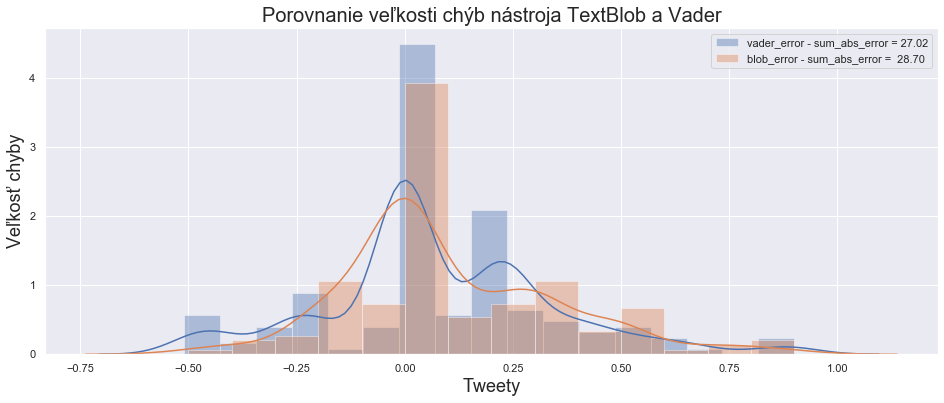

In [17]:
plt.figure(figsize=(16, 6))
#ax = sns.lineplot(x=df.index, y="personal_mark_err", data=df, label = 'personal_mark_error - abs_error =  0.0')
ax = sns.distplot(df.vader_err, label = 'vader_error - sum_abs_error = 27.02')
ax = sns.distplot(df.blob_err, label = 'blob_error - sum_abs_error =  28.70')
ax.set_title('Porovnanie veľkosti chýb nástroja TextBlob a Vader', fontsize = 20)
ax.set_ylabel("Veľkosť chyby", fontsize = 18) 
ax.set_xlabel("Tweety", fontsize = 18) 
ax.legend()
print("Blob abs error")
print(np.abs(df.blob_err).sum())
print("Vader abs error")
print(np.abs(df.vader_err).sum())

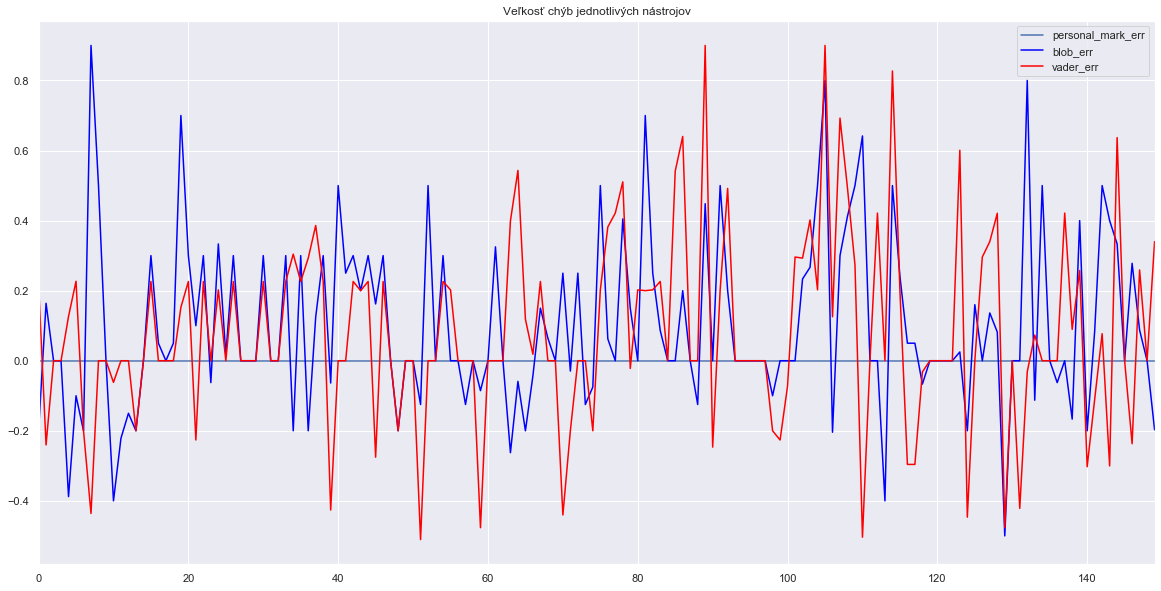

Blob abs error
27.02270803270803
Vader abs error
28.7097


In [27]:
ax = plt.gca(title="Veľkosť chýb jednotlivých nástrojov")
df.plot(kind='line',y='personal_mark_err',ax=ax,figsize=(20,10))
df.plot(kind='line',y='blob_err', color='blue', ax=ax)
df.plot(kind='line',y='vader_err', color='red', ax=ax)

plt.show()
print("Blob abs error")
print(np.abs(df.blob_err).sum())
print("Vader abs error")
print(np.abs(df.vader_err).sum())